#Viewing catalog data using `interface`

The `interface` class is powered by `pandas` so we can easily do a bunch of cool stuff

##Packages to import

In [48]:
import interface

import pandas as pd

import time
import matplotlib.pyplot as plt
%matplotlib inline

## Reading in a file

The `interface` can read in data from a text file or FITS file, it parses the filename extension to work out what the file is. `.fit` or `.fits` is taken to be a FITS file, and anything else is assumed to be a text file.

In [49]:
# catalog data to read in
file_to_read = "/mnt/drive2/cosmoSimsData/big_run_parallel_nodup_r6_nbody_0.9.3Planck_lcd4.5z3lumBHugrizROref2_mock.ascii"

start_time = time.time()
data_manager = interface.ReadCosmoSim(file_to_read)
end_time = time.time()
print "Read file: number of cols =", data_manager.get_number_of_cols(), "rows =", data_manager.get_number_of_rows()
print "Time to read text file =", round(end_time-start_time), "seconds"



Read file: number of cols = 67 rows = 2984014
Time to read text file = 19.0 seconds


Columns that this file contains:



In [50]:
print data_manager.get_column_names()

Index([u'nodeIndex', u'redshift', u'ra', u'dec', u'v_pec', u'log_stellarmass',
       u'metallicity', u'disk_ra', u'disk_dec', u'disk_sigma0', u'disk_re',
       u'disk_index', u'disk_a', u'disk_b', u'disk_theta_los', u'disk_phi',
       u'log_disk_stellarmass', u'disk_age', u'disk_sfr', u'disk_metallicity',
       u'bulge_ra', u'bulge_dec', u'bulge_sigma0', u'bulge_re', u'bulge_index',
       u'bulge_a', u'bulge_b', u'bulge_theta_los', u'bulge_phi',
       u'log_bulge_stellarmass', u'bulge_age', u'bulge_sfr',
       u'bulge_metallicity', u'agn_ra', u'agn_dec', u'agn_mass',
       u'agn_accretnrate', u'SDSS_u:rest:', u'SDSS_g:rest:', u'SDSS_r:rest:',
       u'SDSS_i:rest:', u'SDSS_z:rest:', u'SDSS_u:observed:',
       u'SDSS_g:observed:', u'SDSS_r:observed:', u'SDSS_i:observed:',
       u'SDSS_z:observed:', u'disk_SDSS_u:rest:', u'disk_SDSS_g:rest:',
       u'disk_SDSS_r:rest:', u'disk_SDSS_i:rest:', u'disk_SDSS_z:rest:',
       u'disk_SDSS_u:observed:', u'disk_SDSS_g:observed:',
     

##Display data

In two lines, bin the catalog by rest-frame $g-r$ and plot histograms of the total stellar mass in each bin

(-0.4, -0.1]    [[Axes(0.125,0.125;0.775x0.775)]]
(-0.1, 0.2]     [[Axes(0.125,0.125;0.775x0.775)]]
(0.2, 0.5]      [[Axes(0.125,0.125;0.775x0.775)]]
(0.5, 0.8]      [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

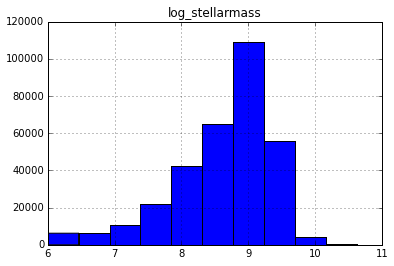

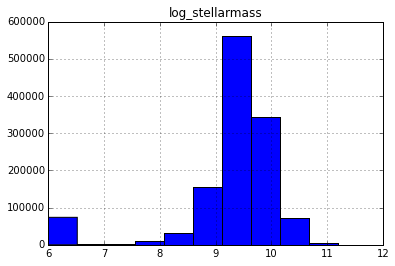

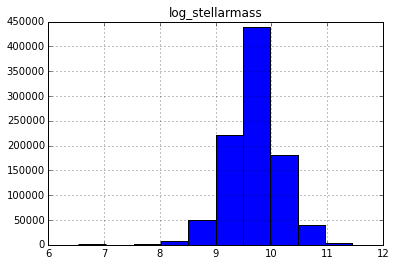

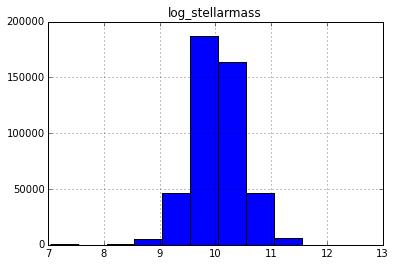

In [51]:

# these are the bin edges, so there willbe four bins in the end
color_bins = [-0.4, -0.1, 0.2, 0.5, 0.8]

# uses pandas `groupby`
# first constructs the g-r color by performing "SDSS_g:rest:" - "SDSS_r:rest:"
# then bins using color bins
groupcolor = data_manager.group_by_color("SDSS_g:rest:", "SDSS_r:rest:", color_bins)
groupcolor.hist(column=["log_stellarmass"])#, sharex=True, normed=True, histtype='stepfilled', color='red')


##Selection

There is a method that aids with selecting on a bunch of different attributes from the catalog. Simply supply a list of tuples containing each condition (they are all then applied together with `AND`):

`(col_to_select_on, operator, value)`

where: 
* `col_to_select_on` is either the string name or integer index of the column to be selected on
* `operator` is one of `">", ">=", "<", "<=", "==", "!="`
* `value` is some numerical value to put with the operator



In [52]:

data_manager.select_given_all_true([("redshift","<",0.5), ("dec",">",1.4), ("dec","<",2.),
                                ("ra",">",1.4), ("ra","<",2.)]).head()

Adding condition that column:  redshift < 0.5
Adding condition that column:  dec > 1.4
Adding condition that column:  dec < 2.0
Adding condition that column:  ra > 1.4
Adding condition that column:  ra < 2.0


,nodeIndex,redshift,ra,dec,v_pec,log_stellarmass,metallicity,disk_ra,disk_dec,disk_sigma0,...,bulge_SDSS_u:rest:,bulge_SDSS_g:rest:,bulge_SDSS_r:rest:,bulge_SDSS_i:rest:,bulge_SDSS_z:rest:,bulge_SDSS_u:observed:,bulge_SDSS_g:observed:,bulge_SDSS_r:observed:,bulge_SDSS_i:observed:,bulge_SDSS_z:observed:
2730438,559,0.4997,1.9783,1.4185,-64.7116,9.6418,0.0102,1.9783,1.4185,21.4377,...,-14.3521,-16.0213,-16.7763,-17.1211,-17.4315,30.6889,28.1744,26.5483,25.6449,25.1854
2730652,228,0.4998,1.8787,1.7052,-605.6963,9.9463,0.0259,1.8787,1.7052,138.9551,...,-17.4717,-19.0079,-19.6999,-20.0118,-20.2648,27.2355,25.0263,23.5019,22.6742,22.2577
2730653,82,0.4995,1.8848,1.6835,-383.5009,8.0150,0.0204,1.8848,1.6835,22.1344,...,-12.8950,-14.4174,-15.0719,-15.3776,-15.6683,32.1183,29.6066,28.0650,27.2748,26.8797
2730654,227,0.4991,1.7805,1.7081,127.6176,6.0609,0.0000,1.7805,1.7081,27.2465,...,100.0000,100.0000,100.0000,100.0000,100.0000,141.8903,141.8903,141.8903,141.8903,141.8903
2731807,69,0.4995,1.7358,1.4271,-253.3992,9.1956,0.0096,1.7358,1.4271,21.9187,...,-13.5364,-15.1879,-15.9312,-16.2727,-16.5917,31.8597,28.9924,27.3734,26.4801,26.0279
